<a href="https://colab.research.google.com/github/youknowds/assignment/blob/python2/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
os.chdir('/content/gdrive/My Drive/')
os.listdir()

['Grand Theft Auto V',
 '고딩 윤호',
 'Colab Notebooks',
 'Brief History of AI (2006).pdf',
 'Brief History of AI (2006).gdoc',
 'KakaoTalk_20200528_150404004.jpg',
 'KakaoTalk_20200528_150404004.gdoc',
 '표지.pdf',
 '통장사본프린트서비스_20200721_081722.pdf',
 'colors.csv',
 'nobel.csv',
 'nobel_new.csv',
 'sets.csv',
 'test',
 'study',
 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv',
 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv',
 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv',
 'DMdata']

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('./test/DM01_test.txt',sep='\t',index_col=False)
df

,Trial,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2
0,1,72,1,1017,3863,2,0,0,0
1,2,122,1,7632,3480,4,0,0,0
2,3,114,1,13866,1264,3,0,0,0
3,4,108,0,17882,1464,1,21083,3549,3
4,5,145,0,25765,1631,1,29133,1032,3
...,...,...,...,...,...,...,...,...,...
523,524,93,1,2369157,597,3,0,0,0
524,525,144,1,2372507,3264,3,0,0,0
525,526,164,0,2378523,714,1,2380975,615,5
526,527,98,0,2382607,631,1,2384975,398,1


In [5]:
df.sort_values(["Task_Type",'Res1'])

,Trial,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2
3,4,108,0,17882,1464,1,21083,3549,3
4,5,145,0,25765,1631,1,29133,1032,3
6,7,5,0,38815,1648,1,42200,732,1
7,8,204,0,44065,1298,1,47100,1065,2
9,10,28,0,55148,2115,1,59000,1032,4
...,...,...,...,...,...,...,...,...,...
512,513,111,1,2326391,664,4,0,0,0
515,516,189,1,2338374,664,4,0,0,0
516,517,99,1,2341790,647,4,0,0,0
518,519,260,1,2348840,680,4,0,0,0


In [6]:
type_test = {'0_1':'HIT-HC', '0_2':'HIT-LC', '0_3':'MISS-LC', '0_4':'MISS-HC', '1_1':'FA-HC', '1_2':'FA-LC', '1_3':'CR-LC', '1_4':'CR-HC'}

def Find_type(df):
    result =[]
    for i in range(len(df)):
        task_type=df.loc[i,'Task_Type']
        res1=df.loc[i,'Res1']
        tmp=type_test['{}_{}'.format(task_type,res1)]
        result.append(tmp)
    return result

df['Response']=Find_type(df)
df

,Trial,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2,Response
0,1,72,1,1017,3863,2,0,0,0,FA-LC
1,2,122,1,7632,3480,4,0,0,0,CR-HC
2,3,114,1,13866,1264,3,0,0,0,CR-LC
3,4,108,0,17882,1464,1,21083,3549,3,HIT-HC
4,5,145,0,25765,1631,1,29133,1032,3,HIT-HC
...,...,...,...,...,...,...,...,...,...,...
523,524,93,1,2369157,597,3,0,0,0,CR-LC
524,525,144,1,2372507,3264,3,0,0,0,CR-LC
525,526,164,0,2378523,714,1,2380975,615,5,HIT-HC
526,527,98,0,2382607,631,1,2384975,398,1,HIT-HC


In [12]:
df['Response'].value_counts(normalize=True)

HIT-HC     0.335227
CR-HC      0.265152
CR-LC      0.172348
HIT-LC     0.070076
MISS-LC    0.053030
FA-LC      0.047348
MISS-HC    0.041667
FA-HC      0.015152
Name: Response, dtype: float64

#8

In [8]:
os.listdir('./test')

['DM07_test.txt',
 'DM31_test.txt',
 'DM09_test.txt',
 'DM08_test.txt',
 'DM06_test.txt',
 'DM30_test.txt',
 'DM01_test.txt',
 'DM23_test.txt',
 'DM15_test.txt',
 'DM12_test.txt',
 'DM24_test.txt',
 'DM13_test.txt',
 'DM14_test.txt',
 'DM25_test.txt',
 'DM22_test.txt',
 'DM04_test.txt',
 'DM02_test.txt',
 'DM03_test.txt',
 'DM05_test.txt',
 'DM27_test.txt',
 'DM20_test.txt',
 'DM18_test.txt',
 'DM16_test.txt',
 'DM11_test.txt',
 'DM29_test.txt',
 'DM10_test.txt',
 'DM17_test.txt',
 'DM28_test.txt',
 'DM21_test.txt',
 'DM26_test.txt',
 'DM19_test.txt']

In [9]:
def Sorted(dataframe):
    dataframe['Response'] = Find_type(dataframe)
    tmp = dataframe['Response'].value_counts(normalize = True).sort_values()
    return tmp  

for file in os.listdir('./test'):
    data = pd.read_csv('./test/{}'.format(file), sep='\t', index_col = False)
    print(Sorted(data))
    print()

FA-HC      0.017045
FA-LC      0.077652
MISS-LC    0.090909
MISS-HC    0.119318
HIT-LC     0.140152
HIT-HC     0.149621
CR-LC      0.160985
CR-HC      0.244318
Name: Response, dtype: float64

FA-LC      0.039773
FA-HC      0.043561
HIT-LC     0.064394
MISS-LC    0.089015
MISS-HC    0.159091
CR-LC      0.168561
HIT-HC     0.187500
CR-HC      0.248106
Name: Response, dtype: float64

MISS-HC    0.001894
CR-HC      0.005682
FA-LC      0.107955
HIT-HC     0.132576
MISS-LC    0.179924
HIT-LC     0.185606
CR-LC      0.386364
Name: Response, dtype: float64

FA-HC      0.009470
MISS-HC    0.045455
FA-LC      0.051136
MISS-LC    0.121212
HIT-LC     0.130682
CR-HC      0.142045
HIT-HC     0.202652
CR-LC      0.297348
Name: Response, dtype: float64

FA-HC      0.032197
MISS-LC    0.037879
CR-LC      0.045455
FA-LC      0.045455
HIT-LC     0.079545
MISS-HC    0.174242
HIT-HC     0.208333
CR-HC      0.376894
Name: Response, dtype: float64

MISS-HC    0.005682
CR-HC      0.026515
FA-LC      0.081439


#9

,HIT-HC,HIT-LC,MISS-LC,MISS-HC,FA-HC,FA-LC,CR-LC,CR-HC
0,0.299242,0.280303,0.181818,0.238636,0.034091,0.155303,0.321970,0.488636
1,0.375000,0.128788,0.178030,0.318182,0.087121,0.079545,0.337121,0.496212
2,0.265152,0.371212,0.359848,0.003788,0.000000,0.215909,0.772727,0.011364
3,0.405303,0.261364,0.242424,0.090909,0.018939,0.102273,0.594697,0.284091
4,0.416667,0.159091,0.075758,0.348485,0.064394,0.090909,0.090909,0.753788
5,0.215909,0.231061,0.541667,0.011364,0.000000,0.162879,0.784091,0.053030
6,0.670455,0.140152,0.106061,0.083333,0.030303,0.094697,0.344697,0.530303
7,0.465909,0.284091,0.219697,0.030303,0.007576,0.276515,0.568182,0.147727
8,0.484848,0.212121,0.030303,0.272727,0.037879,0.174242,0.106061,0.681818
9,0.526515,0.143939,0.193182,0.136364,0.102273,0.170455,0.291667,0.435606


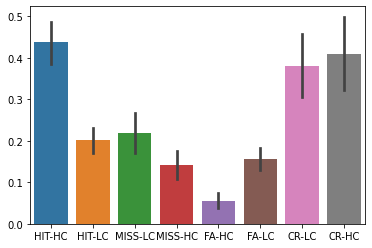

In [ ]:
import seaborn as sns
test_all={}
for file in os.listdir('./test'):
  data = pd.read_csv('./test/{}'.format(file), sep='\t', index_col = False)
  test_all[file]=Sorted(data)
test_all['DM09_test.txt']['FA-HC']=0
test_all['DM30_test.txt']['FA-HC']=0
test_all['DM19_test.txt']['FA-HC']=0

test_prop=pd.DataFrame({})
for typed in type_test.values():
  test_prop[typed]=[file[typed] for file in list(test_all.values())]

test_prop=test_prop*2 # We can use this method instead of calculating the ratio by dividing it into old and new respectively. Because the number of old and new are the same.

display(test_prop)

sns.barplot(data = test_prop)

#9-2

In [48]:
def Sort(dataframe):
    dataframe['Response'] = Find_type(dataframe)
    tmp = dataframe['Response'].value_counts()
    return tmp
  
def percent(df):
  for i in range(len(df)):
    sums=df.iloc[i].sum()
    df.iloc[i]=df.iloc[i]/sums
  return df

In [76]:
import seaborn as sns
test_all={}
for file in os.listdir('./test'):
  data = pd.read_csv('./test/{}'.format(file), sep='\t', index_col = False)
  test_all[file]=Sort(data)

test_all['DM09_test.txt']['FA-HC']=0
test_all['DM30_test.txt']['FA-HC']=0
test_all['DM19_test.txt']['FA-HC']=0

test_prop=pd.DataFrame({})
for typed in type_test.values():
  test_prop[typed]=[file[typed] for file in list(test_all.values())]

display(test_prop)

test_prop_old=test_prop[['HIT-HC','HIT-LC','MISS-LC','MISS-HC']]
test_prop_new=test_prop.drop(['HIT-HC','HIT-LC','MISS-LC','MISS-HC'],axis=1)

test_porp_old=percent(test_prop_old)
test_prop_new=percent(test_prop_new)

test_prop_all = pd.concat([test_prop_old, test_prop_new],axis=1)
print()
display(test_prop_all)

,HIT-HC,HIT-LC,MISS-LC,MISS-HC,FA-HC,FA-LC,CR-LC,CR-HC
0,79,74,48,63,9,41,85,129
1,99,34,47,84,23,21,89,131
2,70,98,95,1,0,57,204,3
3,107,69,64,24,5,27,157,75
4,110,42,20,92,17,24,24,199
5,57,61,143,3,0,43,207,14
6,177,37,28,22,8,25,91,140
7,123,75,58,8,2,73,150,39
8,128,56,8,72,10,46,28,180
9,139,38,51,36,27,45,77,115


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,HIT-HC,HIT-LC,MISS-LC,MISS-HC,FA-HC,FA-LC,CR-LC,CR-HC
0,0.299242,0.280303,0.181818,0.238636,0.034091,0.155303,0.321970,0.488636
1,0.375000,0.128788,0.178030,0.318182,0.087121,0.079545,0.337121,0.496212
2,0.265152,0.371212,0.359848,0.003788,0.000000,0.215909,0.772727,0.011364
3,0.405303,0.261364,0.242424,0.090909,0.018939,0.102273,0.594697,0.284091
4,0.416667,0.159091,0.075758,0.348485,0.064394,0.090909,0.090909,0.753788
5,0.215909,0.231061,0.541667,0.011364,0.000000,0.162879,0.784091,0.053030
6,0.670455,0.140152,0.106061,0.083333,0.030303,0.094697,0.344697,0.530303
7,0.465909,0.284091,0.219697,0.030303,0.007576,0.276515,0.568182,0.147727
8,0.484848,0.212121,0.030303,0.272727,0.037879,0.174242,0.106061,0.681818
9,0.526515,0.143939,0.193182,0.136364,0.102273,0.170455,0.291667,0.435606


In [80]:
percentage_values = []
percentage_types=[]
percentage_category=[]
for i in test_prop_all.columns:
  percentage_values += list(test_prop_all[i])
  percentage_types += list([i]*len(test_prop_all))
percentage_category += ['old']*31*4 + ['new']*31*4

test_prop_final=pd.DataFrame({'values':percentage_values,'types':percentage_types,'category':percentage_category})
test_prop_final

,values,types,category
0,0.299242,HIT-HC,old
1,0.375000,HIT-HC,old
2,0.265152,HIT-HC,old
3,0.405303,HIT-HC,old
4,0.416667,HIT-HC,old
...,...,...,...
243,0.897727,CR-HC,new
244,0.125000,CR-HC,new
245,0.299242,CR-HC,new
246,0.617424,CR-HC,new


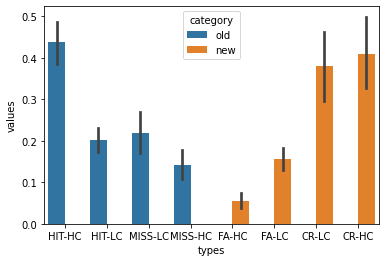

In [82]:
sns.barplot(data=test_prop_final,x='types',y='values',hue='category')

#10-1

In [ ]:
test1=pd.read_csv('./test/DM01_test.txt',sep='\t',index_col=False)
test1['Response']=Find_type(test1)
test1=test1[test1['Task_Type']==0]
study1=pd.read_csv('./study/DM01_study.txt',sep='\t',index_col=False)
study1.rename(columns = {"ObjID": "Object_ID"}, inplace = True)

display(test1)
print()
display(study1)

,Trial,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2,Response
3,4,108,0,17882,1464,1,21083,3549,3,HIT-HC
4,5,145,0,25765,1631,1,29133,1032,3,HIT-HC
5,6,118,0,31299,2081,3,35117,2682,5,MISS-LC
6,7,5,0,38815,1648,1,42200,732,1,HIT-HC
7,8,204,0,44065,1298,1,47100,1065,2,HIT-HC
...,...,...,...,...,...,...,...,...,...,...
514,515,220,0,2333307,997,3,2336042,1198,3,MISS-LC
520,521,128,0,2355674,1397,1,2358808,616,2,HIT-HC
525,526,164,0,2378523,714,1,2380975,615,5,HIT-HC
526,527,98,0,2382607,631,1,2384975,398,1,HIT-HC


,Trial,Object_ID,LocID,FB,Task,RT,Stim
0,1,245,4,1,-2,796,4010
1,2,183,2,1,-2,882,12022
2,3,54,1,1,-2,115,18020
3,4,220,3,1,-2,149,24018
4,5,65,2,1,-2,815,30016
...,...,...,...,...,...,...,...
259,260,35,4,1,-1,565,679958
260,261,122,2,1,-1,582,687955
261,262,163,1,1,-1,714,697953
262,263,30,4,1,-1,682,703950


In [ ]:
result=pd.merge(test1,study1,on='Object_ID',how='right')
result

,Trial_x,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2,Response,Trial_y,LocID,FB,Task,RT,Stim
0,4,108,0,17882,1464,1,21083,3549,3,HIT-HC,56,3,1,-2,615,435987
1,5,145,0,25765,1631,1,29133,1032,3,HIT-HC,175,3,1,-1,716,20001
2,6,118,0,31299,2081,3,35117,2682,5,MISS-LC,62,3,1,1,349,498000
3,7,5,0,38815,1648,1,42200,732,1,HIT-HC,236,1,0,1,883,491967
4,8,204,0,44065,1298,1,47100,1065,2,HIT-HC,168,2,0,2,731,631942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,515,220,0,2333307,997,3,2336042,1198,3,MISS-LC,4,3,1,-2,149,24018
260,521,128,0,2355674,1397,1,2358808,616,2,HIT-HC,224,2,1,-2,916,401979
261,526,164,0,2378523,714,1,2380975,615,5,HIT-HC,207,4,1,2,696,267992
262,527,98,0,2382607,631,1,2384975,398,1,HIT-HC,187,2,1,1,782,101975


In [ ]:
result=result[['Object_ID','Res2','LocID','Response']]
result=result[result['Res2']!=5]
result

,Object_ID,Res2,LocID,Response
0,108,3,3,HIT-HC
1,145,3,3,HIT-HC
3,5,1,1,HIT-HC
4,204,2,2,HIT-HC
5,28,4,1,HIT-HC
...,...,...,...,...
258,137,2,2,HIT-HC
259,220,3,3,MISS-LC
260,128,2,2,HIT-HC
262,98,1,2,HIT-HC


In [ ]:
def Accuracy(df):
  final=[]
  for i in df.index:
    res=df.loc[i,'Res2']
    loc=df.loc[i,'LocID']
    if (res==loc):
      tmp=1
    else:
      tmp=0
    final.append(tmp)
  return final

result['Acc']=Accuracy(result)

result

,Object_ID,Res2,LocID,Response,Acc
0,108,3,3,HIT-HC,1
1,145,3,3,HIT-HC,1
3,5,1,1,HIT-HC,1
4,204,2,2,HIT-HC,1
5,28,4,1,HIT-HC,0
...,...,...,...,...,...
258,137,2,2,HIT-HC,1
259,220,3,3,MISS-LC,1
260,128,2,2,HIT-HC,1
262,98,1,2,HIT-HC,0


In [ ]:
a=result.groupby('Response')['Acc'].sum()
a

Response
HIT-HC     143
HIT-LC       8
MISS-LC      3
Name: Acc, dtype: int64

In [ ]:
b=result.groupby('Response')['Acc'].count()
b

Response
HIT-HC     161
HIT-LC      18
MISS-LC      5
Name: Acc, dtype: int64

In [ ]:
perc=pd.DataFrame({})
perc['Accuracy']=a/b

perc

,Accuracy
Response,
HIT-HC,0.888199
HIT-LC,0.444444
MISS-LC,0.600000


In [ ]:
perc=pd.DataFrame({})
perc['Accuracy']=a/b
types=['HIT-HC', 'HIT-LC', 'MISS-LC','MISS-HC']

for i in types:
  if(i not in list(perc.index)):
    col=[0]
    tmp=pd.DataFrame(col,columns=perc.columns, index=[i])
    perc=perc.append(tmp)

In [ ]:
perc

,Accuracy
HIT-HC,0.888199
HIT-LC,0.444444
MISS-LC,0.600000
MISS-HC,0.000000


#10-2

In [ ]:
def clean_merge(df1,df2):
  df1['Response']=Find_type(df1)
  df1=df1[df1['Task_Type']==0]
  df2.rename(columns = {"ObjID": "Object_ID"}, inplace = True)
  df3=pd.merge(df1,df2,on='Object_ID',how='right')
  df3=df3[['Object_ID','Res2','LocID','Response']]
  df3=df3[df3['Res2']!=5]
  return df3


def percent(result):
  sum=result.groupby('Response')['Acc'].sum()
  count=result.groupby('Response')['Acc'].count()
  perc=pd.DataFrame({})
  perc['Accuracy']=sum/count
  return perc

types=['HIT-HC', 'HIT-LC', 'MISS-LC','MISS-HC']

def modify(df):
  for i in types:
    if(i not in list(df.index)):
      col=[0]
      tmp=pd.DataFrame(col,columns=df.columns, index=[i])
      df=df.append(tmp)
  return df

In [ ]:
file = 'DM01'
test=pd.read_csv('./test/{}_test.txt'.format(file),sep='\t',index_col=False)
study=pd.read_csv('./study/{}_study.txt'.format(file),sep='\t',index_col=False)
result=clean_merge(test,study)
result['Acc']=Accuracy(result)
percs=percent(result)
acc_all[file]=modify(percs)

list(acc_all.values())[0].loc['HIT-HC', 'Accuracy']

0.4673913043478261

In [ ]:
acc_all={}

for file in os.listdir('./DMdata'):
  test=pd.read_csv('./test/{}_test.txt'.format(file),sep='\t',index_col=False)
  study=pd.read_csv('./study/{}_study.txt'.format(file),sep='\t',index_col=False)
  result=clean_merge(test,study)
  result['Acc']=Accuracy(result)
  percs=percent(result)
  acc_all[file]=modify(percs)

acc_prop=pd.DataFrame({})
  
for typed in types:
   acc_prop[typed]=[file.loc[typed, 'Accuracy'] for file in list(acc_all.values())]

acc_prop

,HIT-HC,HIT-LC,MISS-LC,MISS-HC
0,0.467391,0.047619,0.250000,1.000000
1,0.880952,0.523810,0.000000,0.000000
2,0.303030,0.280000,0.500000,0.000000
3,0.666667,0.285714,0.500000,0.000000
4,0.545455,0.000000,0.000000,0.000000
5,0.664634,0.347826,0.375000,0.250000
6,0.816901,0.666667,0.000000,0.000000
7,0.708333,0.235294,0.333333,0.000000
8,0.625000,0.351351,0.000000,0.000000
9,0.581081,0.000000,0.000000,0.000000


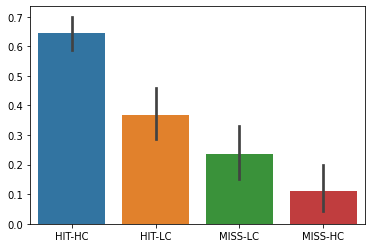

In [ ]:
sns.barplot(data = acc_prop)

#11

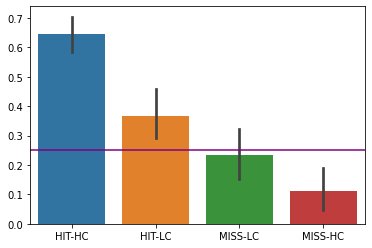

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(data = acc_prop)
plt.axhline(y=0.25, color='purple')